In [4]:
import mplfinance as mpf
import pandas as pd
from pathlib import Path
import numpy as np
import datetime

In [5]:
# Get BTC OHLCV dataframe
# df = pd.read_csv(Path("BTC-USD-20201005-20211005.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
df = pd.read_csv(Path("./Resources/BTC-5YRS-D.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
# df.drop(['Adj Close'], axis=1, inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
display(df.head())
display(df.tail())

,Open,Low,High,Close,Volume
Date,,,,,
2017-08-16,4261.48,4200.74,4485.39,4285.08,795.150377
2017-08-17,4285.08,3938.77,4371.52,4108.37,1199.888264
2017-08-18,4108.37,3850.00,4184.69,4139.98,381.309763
2017-08-19,4120.98,4032.62,4211.08,4086.29,467.083022
2017-08-20,4069.13,3911.79,4119.62,4016.00,691.743060


,Open,Low,High,Close,Volume
Date,,,,,
2021-10-07,53785.22,53617.61,56100.00,53951.43,46160.257850
2021-10-08,53955.67,53661.67,55489.00,54949.72,55177.080130
2021-10-09,54949.72,54080.00,56561.31,54659.00,89237.836128
2021-10-10,54659.01,54415.06,57839.04,57471.35,52933.165751
2021-10-11,57471.35,56588.00,57471.35,56999.12,4288.486640


In [6]:
# Slice of double bottom
# intra = df.loc['10-05-2020':'10-05-2021']
intra = df.dropna()
intra

,Open,Low,High,Close,Volume
Date,,,,,
2017-08-16,4261.48,4200.74,4485.39,4285.08,795.150377
2017-08-17,4285.08,3938.77,4371.52,4108.37,1199.888264
2017-08-18,4108.37,3850.00,4184.69,4139.98,381.309763
2017-08-19,4120.98,4032.62,4211.08,4086.29,467.083022
2017-08-20,4069.13,3911.79,4119.62,4016.00,691.743060
...,...,...,...,...,...
2021-10-07,53785.22,53617.61,56100.00,53951.43,46160.257850
2021-10-08,53955.67,53661.67,55489.00,54949.72,55177.080130
2021-10-09,54949.72,54080.00,56561.31,54659.00,89237.836128


C:\Users\jpmad\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


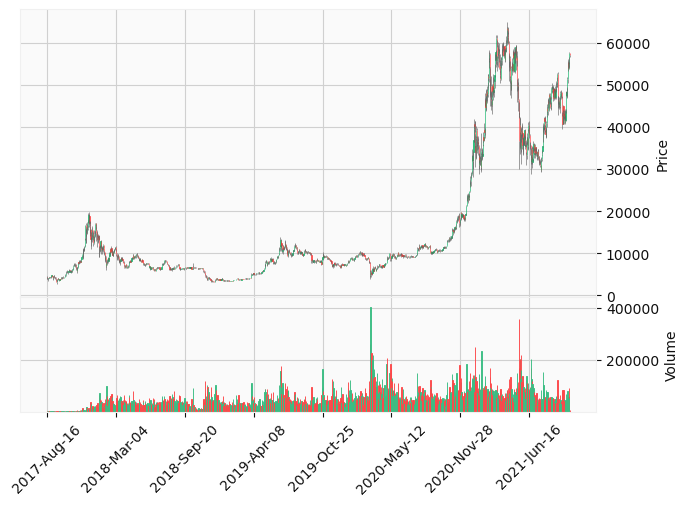

In [7]:
mpf.plot(intra, type="candle", style="yahoo", volume=True)

In [8]:
intra.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1518 entries, 2017-08-16 to 2021-10-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1518 non-null   float64
 1   Low     1518 non-null   float64
 2   High    1518 non-null   float64
 3   Close   1518 non-null   float64
 4   Volume  1518 non-null   float64
dtypes: float64(5)
memory usage: 71.2 KB


In [9]:
# Check if there is a previous bar
def update_cert(cert, index, df):
    # Create certifying candle
    # count number of null values to see if is first row
    null_count = 0
    for value in cert.values():
        if value == None:
            null_count += 1
    
    # update prev dictionary if all null values
    # if first row it will update with those values
    if null_count == 5:
        cert['t'] = index
        cert['o'] = float(df.loc[index]['Open'])
        cert['c'] = float(df.loc[index]['Close'])
        cert['h'] = float(df.loc[index]['High'])
        cert['l'] = float(df.loc[index]['Low'])
        
        # return the certying candle dictionary
        return cert
    
    # update prev with new prev values (new prev is old curr)
    else:
        if index + datetime.timedelta(days=1):
            cert['t'] = (index)
            cert['o'] = float(df.loc[index]['Open'])
            cert['c'] = float(df.loc[index]['Close'])
            cert['h'] = float(df.loc[index]['High'])
            cert['l'] = float(df.loc[index]['Low'])
        
            # return the certying candle dictionary
            return cert
        
def update_curr(curr, index, df):
    # Create current dictionary of current candle
    idx = df.index  
    
    # format datetime index
    dt_object = (index - datetime.timedelta(days=1)).to_datetime64()
    
    if sum(df.index == dt_object) > 0:
        index -= datetime.timedelta(days=1)
        curr['t'] = (index)
        curr['o'] = float(df.loc[index]['Open'])
        curr['c'] = float(df.loc[index]['Close'])
        curr['h'] = float(df.loc[index]['High'])
        curr['l'] = float(df.loc[index]['Low'])
        
        # return the current candle dictionary
        return curr
    else:
        pass
        
def update_prev(prev, index, df):
    # Create the previous candle
    idx = df.index
    

    dt_object = (index - datetime.timedelta(days=2)).to_datetime64()

    if sum(df.index == dt_object) > 0:
        index -= datetime.timedelta(days=2)
        prev['t'] = (index)
        prev['o'] = float(df.loc[index]['Open'])
        prev['c'] = float(df.loc[index]['Close'])
        prev['h'] = float(df.loc[index]['High'])
        prev['l'] = float(df.loc[index]['Low'])
        
        # return the previous candle dictionary
        return prev
    else:
        pass

In [10]:
def find_max(cert_candle, curr_candle, prev_candle):
    # get local max
    max_dict = {}
    if curr_candle and prev_candle:       
        if (curr_candle['c'] > cert_candle['c']) & (curr_candle['c'] > prev_candle['c']):
            max_dict = curr_candle
            return max_dict
        else:
            return None
        
def find_min(cert_candle, curr_candle, prev_candle):   
    # get local min
    min_dict = {}
    if curr_candle and prev_candle:
        if (curr_candle['c'] < cert_candle['c']) & (curr_candle['c'] < prev_candle['c']):
            min_dict = curr_candle
            return min_dict
        else:
            return None

In [11]:
def create_dataframe(df):
    """
    Create DataFrame with local minimums and maximums to create signals for double bottom creation
    Accepts DataFrames with columns formatted as 'Open', 'Close', 'High', 'Low'.
    More columns can be added.
    """
    
    # # store previous candle
    prev = {
        't' : None,
        'o' : None,
        'c' : None,
        'h' : None,
        'l' : None   
    }

    # store current candle
    curr = {
        't' : None,
        'o' : None,
        'c' : None,
        'h' : None,
        'l' : None 
    }

    # store certifying candle (certifies if the max/min is created)
    cert = {
        't' : None,
        'o' : None,
        'c' : None,
        'h' : None,
        'l' : None 
    }

    # Init lists for max and min events
    max_ = []
    min_ = []

    # Iterrate through dataframes indexes
    for index in df.index:
        cert_candle = update_cert(cert, index, df)
        curr_candle = update_curr(curr, index, df)
        prev_candle = update_prev(prev, index, df)

        # pont f arbitrary - 5 periods out
        # when finished will have 6 values
        mx = find_max(cert_candle, curr_candle, prev_candle)
        mn = find_min(cert_candle, curr_candle, prev_candle)

        # max stores close and high
        # min stores close and low
        if mx == None:
            max_.append(0)
        else:
            max_.append(1)

        if mn == None:
            min_.append(0)      
        else:
            min_.append(1)

    # Adding min/max events to original dataframe then creating a copy with columns for double bottom events
    max_min_df = pd.DataFrame({'Max': max_, 'Min': min_})
    max_min_df = max_min_df[['Max', 'Min']].shift(-1)
    max_min_df['Date'] = df.index
    max_min_df.set_index('Date', inplace=True)
    df_features = pd.concat([df, max_min_df], axis=1)
    df_features[['A', 'B', 'C', 'D', 'E', 'F', 'DB']] = 0.0
    
    return df_features

In [12]:
display(create_dataframe(intra).head())
new_df = create_dataframe(intra)

,Open,Low,High,Close,Volume,Max,Min,A,B,C,D,E,F,DB
Date,,,,,,,,,,,,,,
2017-08-16,4261.48,4200.74,4485.39,4285.08,795.150377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-17,4285.08,3938.77,4371.52,4108.37,1199.888264,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-18,4108.37,3850.00,4184.69,4139.98,381.309763,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-19,4120.98,4032.62,4211.08,4086.29,467.083022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-20,4069.13,3911.79,4119.62,4016.00,691.743060,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# event_list_shannon = []
# def create_list_of_event_points_to_add_to_event_dictionar(date_range_dataframe):
#     for i in date_range_dataframe check if this date's prices' make up local max
#         if yes, store to list labeled event %(+1) = ['a']
#         (assign position of a list to a variable)
#         check event1_list; if [0] is not null then check if this date's prices' make up a local min and assign value b
#         check event1_list; if [1] is not null then check if this date's prices' make up a local max and assign value c; c should be lower than a but higher than b; if conditions are not met, clear event list and start new list iteration on next date
#         check event1_list; if [2] is not null then check if this date's prices' make up a local min and assign value d; if this is min then continue to [check for b conditions]  if local min close is in range of b (between b close and b low) then local min event point d or if local min d low is in range of b close and b low then local min is event point d, elif close d is below b low then delete list and start next date     
#         check event1_list; if [3] is not null then check if this date's prices'are higher than event point c and assign value e
#         check event1_list; if [4] is not null then find price 5 days after point e and label this +5 day price point f
#         check event1_list; if [5] is not null then find price 5 days before point a and label this as the"lead up" event point

In [53]:
def get_events(new_df):
    """Returns dataframe with binary encoded events"""
    
    # Init return variables
    events_list = [None, None, None, None, None]
    search_c = {}
    total_occurrences = 0
    occurrences = {}
    
    # Init helper variables
    buy = None
    sell = None
    sales = []
    buys = []
    maxs = []
    mins = []
    
    for index in new_df.index:
        # Store all local max indexes
        if new_df.loc[index, 'Max'] == 1:
            maxs.append(index)
            
        # Store all local min indexes
        if new_df.loc[index, 'Min'] == 1:
            mins.append(index)
            
        # Start search for A if A is none
        if events_list[0] == None:
            if new_df.loc[index, 'Max'] == 1:
                events_list[0] = index
                new_df.loc[index, 'A'] = 1
                
                
        # Show that A exists
        elif events_list[0] != None:
            new_df.loc[index, 'A'] = 1
            
        # Reset if does not exist
        else:
            new_df.loc[index, 'A'] = 0
            
        # Start search for B if B is none
        if (events_list[1] == None) & (events_list[0] != None):
            if new_df.loc[index, 'Min'] == 1:
                if new_df.loc[index, 'Close'] < new_df.loc[events_list[0], 'Close']:
                    events_list[1] = index
                    new_df.loc[index, 'B'] = 1
                else:
                    new_df.loc[index, 'B'] = 0
                    
        # Show that B exists
        elif events_list[1] != None:
            new_df.loc[index, 'B'] = 1
            
        # Reset if does not exist    
        else:
            new_df.loc[index, 'B'] = 0

        # Start search for C
        if (events_list[2] == None) & (events_list[1] != None) & (events_list[0] != None):
            if new_df.loc[index, 'Max'] == 1:
                
                # Establish conditions
                condition_1 = (new_df.loc[index, 'Close'] > new_df.loc[events_list[1], 'Close'])
                condition_2 = (new_df.loc[index, 'Close'] < new_df.loc[events_list[0], 'Close'])
                
                # if C is in range between B and A
                if condition_1 & condition_2:
                    events_list[2] = index
                    new_df.loc[index, 'C'] = 1
                    
                # if C is higher than A
                elif new_df.loc[index, 'Close'] > new_df.loc[events_list[0], 'Close']:
                    new_df.loc[index, 'C'] = 0
                    new_df.loc[index, 'B'] = 0
                    events_list = [None, None, None, None, None]
                    
        # Show if C exists
        elif events_list[2] != None:
            new_df.loc[index, 'C'] = 1
            
        # Reset if does not exist   
        else:
            new_df.loc[index, 'C'] = 0
            
        # Start search for D
        if (events_list[3] == None) & (events_list[2] != None) & (events_list[1] != None) & (events_list[0] != None):
            if new_df.loc[index, 'Min'] == 1:   
                
                # Establish conditions
                condition_1 = (new_df.loc[index, 'Close'] < new_df.loc[events_list[1], 'Close'])
                condition_2 = (new_df.loc[index, 'Close'] > new_df.loc[events_list[1], 'Low'])
                condition_3 = (new_df.loc[index, 'Low'] < new_df.loc[events_list[1], 'Close'])
                condition_4 = (new_df.loc[index, 'Low'] > new_df.loc[events_list[1], 'Low'])
                
                # Exit conditions
                e_cond = (new_df.loc[index, 'Close'] < new_df.loc[events_list[1], 'Low'])
#                 e_cond_2 = (new_df.loc[index, 'Low'] < new_df.loc[events_list[1], 'Low'])
                
                # if D is in the range of B's low and close
                if condition_1 & condition_2 | condition_3 & condition_4:
                    events_list[3] = index
                    new_df.loc[index, 'D'] = 1
                    
                    # Search between B and D for highest max
                    for index in new_df.loc[events_list[1]:events_list[3]].index:
                        if new_df.loc[index, 'Max'] == 1:
                            search_c[index] = new_df.loc[index, 'Close']

                    # find max c value and add it to the events list
                    max_c = max(search_c, key = lambda x: search_c[x])
                    events_list[2] = max_c
                    max_c = max_c.to_datetime64()
                    new_df.loc[max_c, 'C'] = 1

                
                
                # if D is less than B's low
                elif e_cond:
                    if new_df.loc[index, 'Min'] == 1:
                        events_list = [maxs[-1], index, None, None, None]
                        search_c = {}
                    else:
                        events_list = [maxs[-1], None, None, None, None]
                        search_c = {}
                    
        # Show if D exists
        elif events_list[3] != None:
            new_df.loc[index, 'D'] = 1
        
        # Reset if does not exist
        else:
            new_df.loc[index, 'D'] = 0
            
        # start search E trade (entry)
        if (events_list[4] == None) & (events_list[3] != None) & (events_list[2] != None) & (events_list[1] != None) & (events_list[0] != None):
            if new_df.loc[index, 'Close'] > new_df.loc[events_list[2], 'Close']:
                events_list[4] = index
                new_df.loc[index, 'E'] = 1
                new_df.loc[index, 'DB'] = 1
                occurrences[total_occurrences] = events_list
                total_occurrences += 1
                
                if events_list[4] != None:
                    events_list = [None, None, None, None, None]
                    

                
            # restart if close below D
            elif new_df.loc[index, 'Close'] < new_df.loc[events_list[3], 'Low']:
                new_a = events_list[2]
                events_list = [new_a, None, None, None, None]
                search_c = {}
                
        # Set buy date
        if new_df.loc[index, 'DB'] == 1:
            buy = index
            sell = (index + datetime.timedelta(days=10)).to_datetime64()
            sales.append(sell)
            buys.append(buy)
            events_list = [None, None, None, None, None]
        
#         sum(df.index == dt_object) > 0
        
        if sum(new_df.index == sell) > 0:
            new_df.loc[buy, 'F'] = 0
            new_df.loc[sell, 'F'] = float(new_df.loc[sell, 'Close'] - new_df.loc[buy, 'Close'])
#             new_df.loc[sell]['DB'] = -1          
        
#         print(events_list)
#         print(new_df.loc[index])
            
        
    return new_df, total_occurrences, occurrences, sales

In [54]:
new_df, total_occurrences, occurrences, sales = get_events(new_df)

# new_df.to_csv(Path('./Resources/features_df_1.csv'))

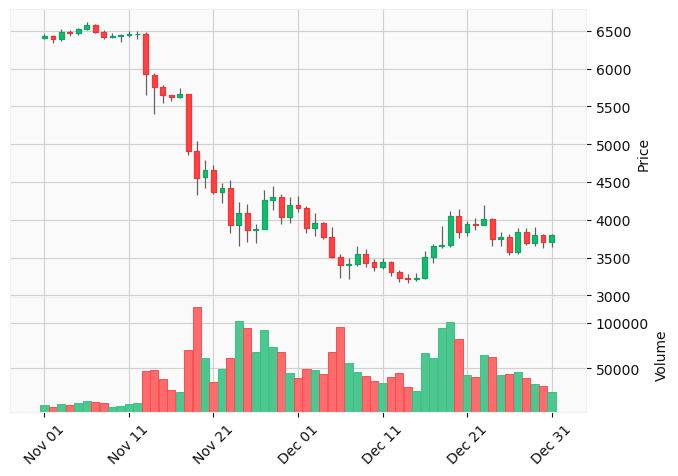

In [55]:
mpf.plot(new_df.loc['2018-11':'2018-12'], type="candle", style="yahoo", volume=True)

In [64]:
mpf.plot(new_df.loc['2019-10-28':'2019-11-03'], type="candle", style="yahoo", volume=True, savefig='db-19-10-28-11-03.png')

In [57]:
pd.set_option('display.max_rows', None)

In [63]:
display(new_df.tail())

,Open,Low,High,Close,Volume,Max,Min,A,B,C,D,E,F,DB
Date,,,,,,,,,,,,,,
2021-10-07,53785.22,53617.61,56100.00,53951.43,46160.257850,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2021-10-08,53955.67,53661.67,55489.00,54949.72,55177.080130,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2021-10-09,54949.72,54080.00,56561.31,54659.00,89237.836128,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2021-10-10,54659.01,54415.06,57839.04,57471.35,52933.165751,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2021-10-11,57471.35,56588.00,57471.35,56999.12,4288.486640,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
new_df

In [59]:
total_occurrences

15

In [60]:
occurrences

{0: [Timestamp('2017-11-19 00:00:00'),
  Timestamp('2017-11-20 00:00:00'),
  Timestamp('2017-11-21 00:00:00'),
  Timestamp('2017-11-22 00:00:00'),
  Timestamp('2017-11-24 00:00:00')],
 1: [Timestamp('2018-01-14 00:00:00'),
  Timestamp('2018-01-15 00:00:00'),
  Timestamp('2018-01-16 00:00:00'),
  Timestamp('2018-01-17 00:00:00'),
  Timestamp('2018-01-18 00:00:00')],
 2: [Timestamp('2018-01-19 00:00:00'),
  Timestamp('2018-01-21 00:00:00'),
  Timestamp('2018-01-23 00:00:00'),
  Timestamp('2018-01-25 00:00:00'),
  Timestamp('2018-01-26 00:00:00')],
 3: [Timestamp('2018-08-04 00:00:00'),
  Timestamp('2018-08-07 00:00:00'),
  Timestamp('2018-08-08 00:00:00'),
  Timestamp('2018-08-09 00:00:00'),
  Timestamp('2018-08-16 00:00:00')],
 4: [Timestamp('2018-09-26 00:00:00'),
  Timestamp('2018-09-28 00:00:00'),
  Timestamp('2018-09-29 00:00:00'),
  Timestamp('2018-10-02 00:00:00'),
  Timestamp('2018-10-04 00:00:00')],
 5: [Timestamp('2019-01-23 00:00:00'),
  Timestamp('2019-01-28 00:00:00'),
  Tim

In [61]:
mpf.plot(new_df.loc['2017-09-10':'2017-09-26'], type="candle", style="yahoo", volume=True, savefig='db-2017-09-10-26.png')

In [65]:
counts = new_df.loc[new_df['DB'] == 1]
counts

,Open,Low,High,Close,Volume,Max,Min,A,B,C,D,E,F,DB
Date,,,,,,,,,,,,,,
2017-09-26,3882.36,3872.81,4249.94,4193.00,628.170966,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2017-11-24,8138.99,8090.00,8734.78,8700.01,4292.623682,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2018-01-18,10960.00,10360.00,11795.00,11474.98,34129.375421,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2018-01-26,11089.00,10842.69,11650.00,11491.00,18860.768345,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2018-04-01,6813.01,6765.00,7125.00,7056.00,32123.560072,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2018-08-16,6316.00,6285.40,6585.00,6584.49,57851.610803,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2018-10-04,6591.69,6543.08,6697.00,6635.65,16096.552392,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2019-02-07,3398.40,3373.10,3733.58,3659.04,47968.058013,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2019-03-04,3716.10,3703.55,3877.10,3857.73,32962.536162,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [68]:
total = 0
shares = 5
for sale in sales:   
    total += (new_df.loc[sale, 'F']
    
display(total*shares)

SyntaxError: invalid syntax (<ipython-input-68-dd4b85098442>, line 6)

In [24]:
# potentially put in previous high as another variable

# b and d must be found to find c, a and e.



# point b is a local min 
# and point c is a local max that is greater than b and less than a
# and point d is less than c and in the range (it's close or wick) of b (close and low wick)
# and e closes above c
# BUY



In [25]:
# Logic to store double bottom points
# logic to break pattern
# Logic for entry